## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # to make principal components
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)  # for evaluating linear regression model

## Loading and reviewing the data

In [2]:
data = pd.read_csv("Datasets/boston.csv")
data.shape

(506, 13)

In [3]:
data.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Observations:
1. The average per capita crime rate by town is 3.61%
2. The average proportion of residential land zoned for lots over 25,000 sq.ft is 11.36%
3. The average proportion of non-retail business acres per town is 11.13%
4. The average value of Charles River dummy variable (1 if tract bounds river; 0 otherwise) is 0.06
5. The average nitric oxides concentration (parts per 10 million) is 55.46%
6. The average number of rooms per dwelling is 6.28
7. The average proportion of owner-occupied units built prior to 1940 is 68.57
8. The average weighted distances to five Boston employment centres is 3.79
9. The average index of accessibility to radial highways is 9.54
10. The average full-value property-tax rate per 10000 dollars is 408.23
11. The average pupil-teacher ratio by town is 18.45
12. The average % lower status of the population is 12.65
13. The average median value of owner-occupied homes in $1000's is 22.53

In [6]:
# Checking for null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

# EDA

CRIM


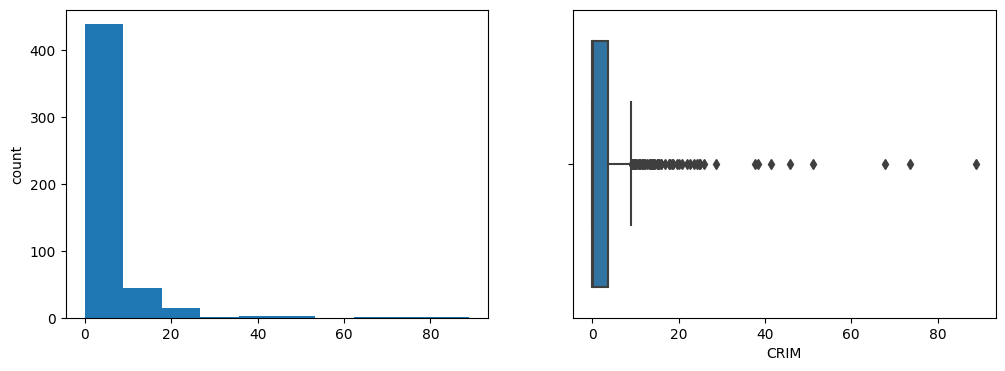

ZN


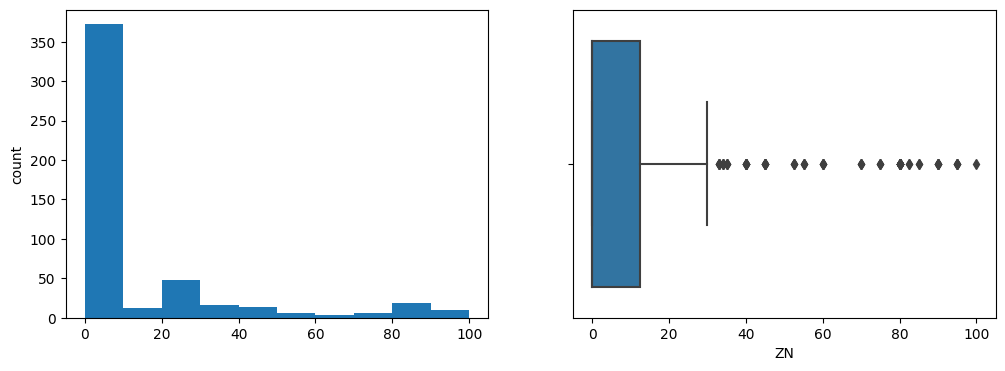

INDUS


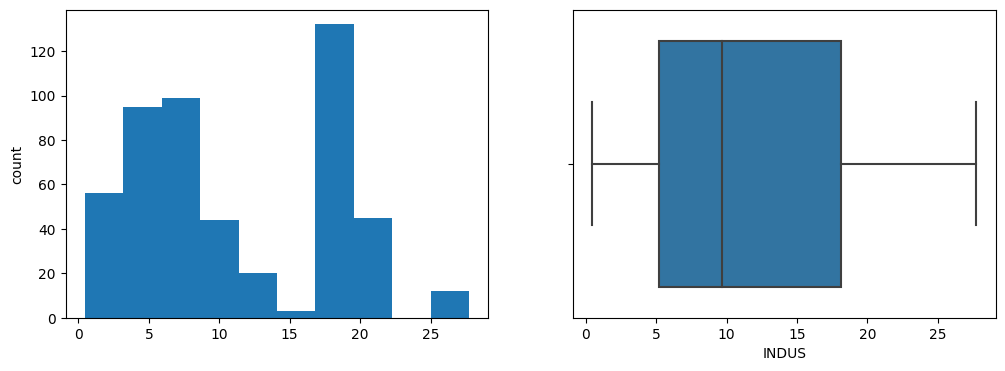

CHAS


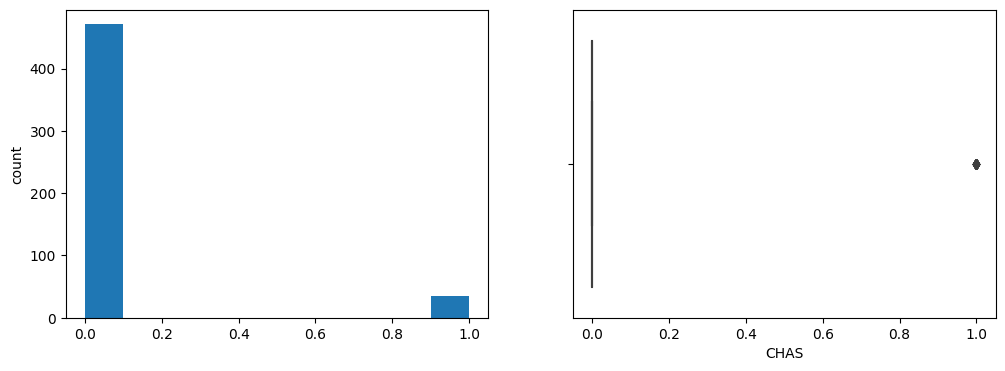

NX


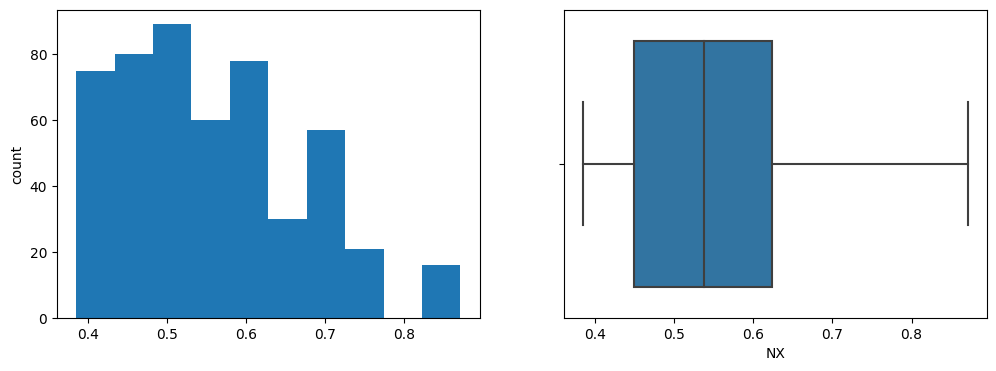

RM


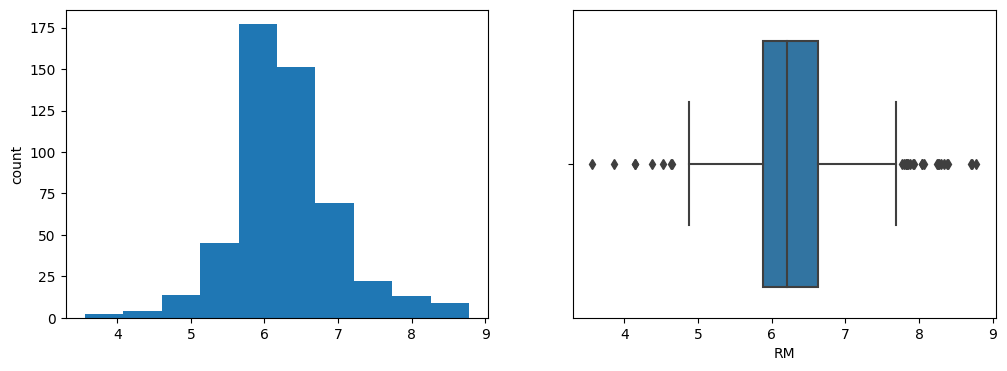

AGE


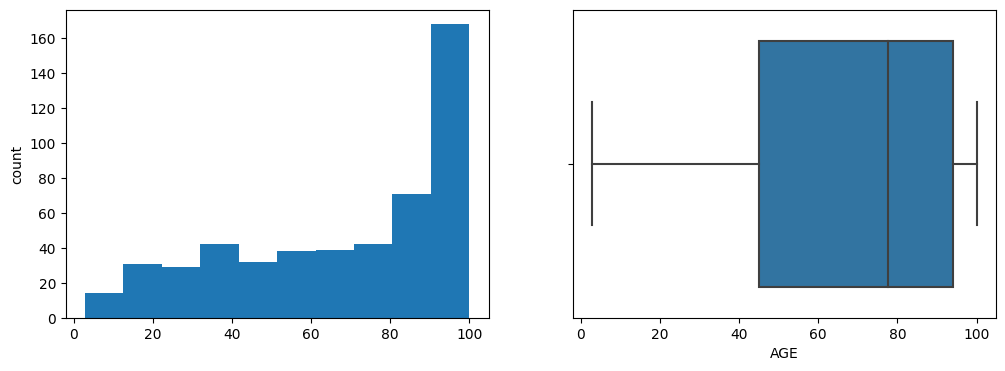

DIS


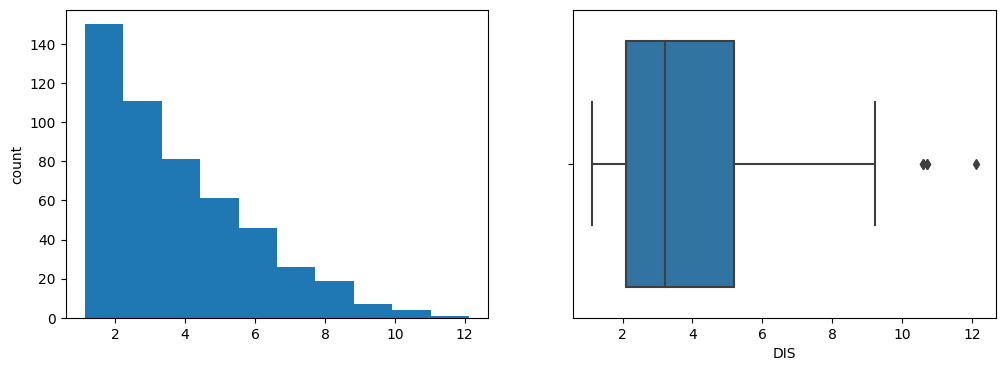

RAD


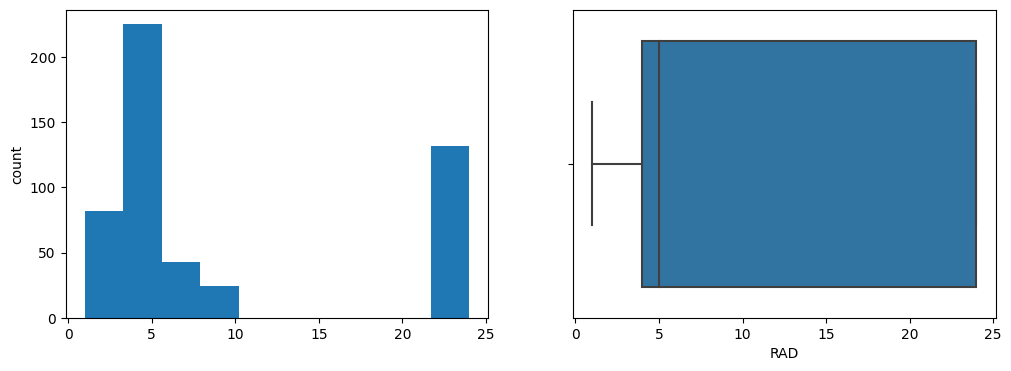

TAX


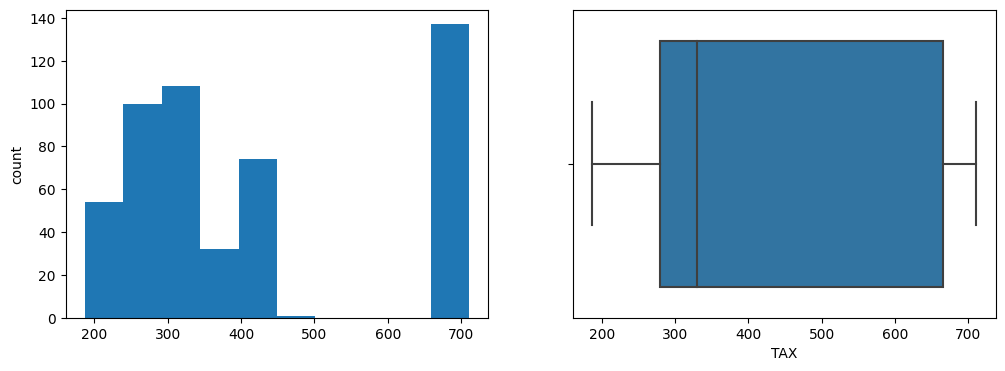

PTRATIO


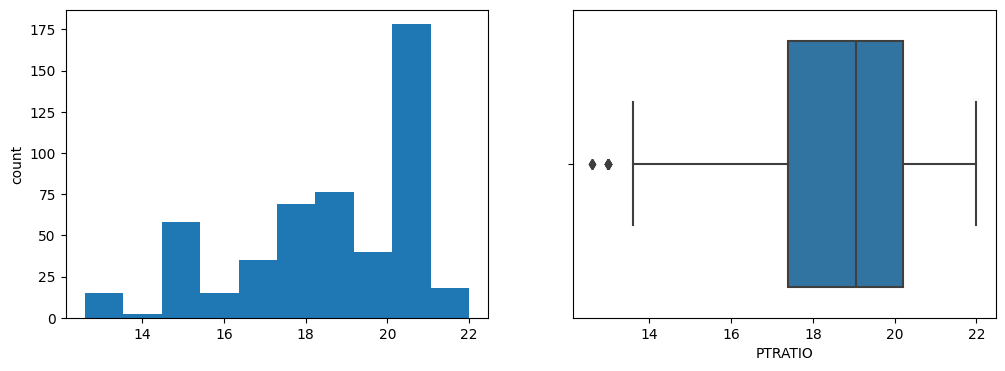

LSTAT


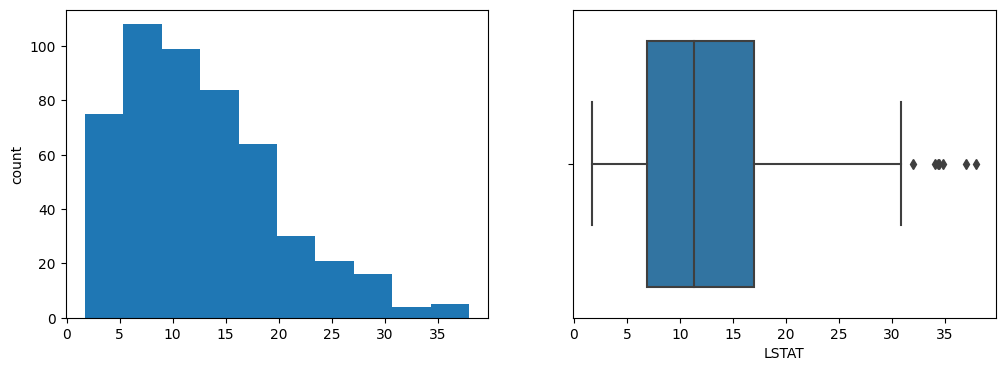

MEDV


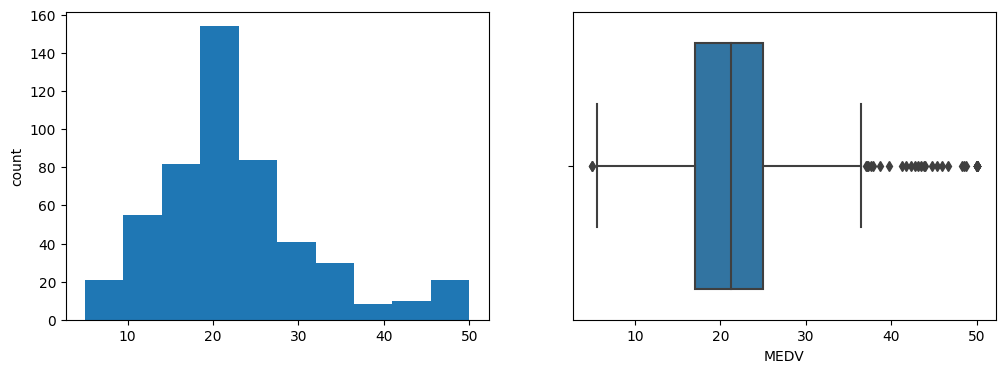

In [7]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        print(col)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        data[col].hist(bins=10, grid=False)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col])
        plt.show()

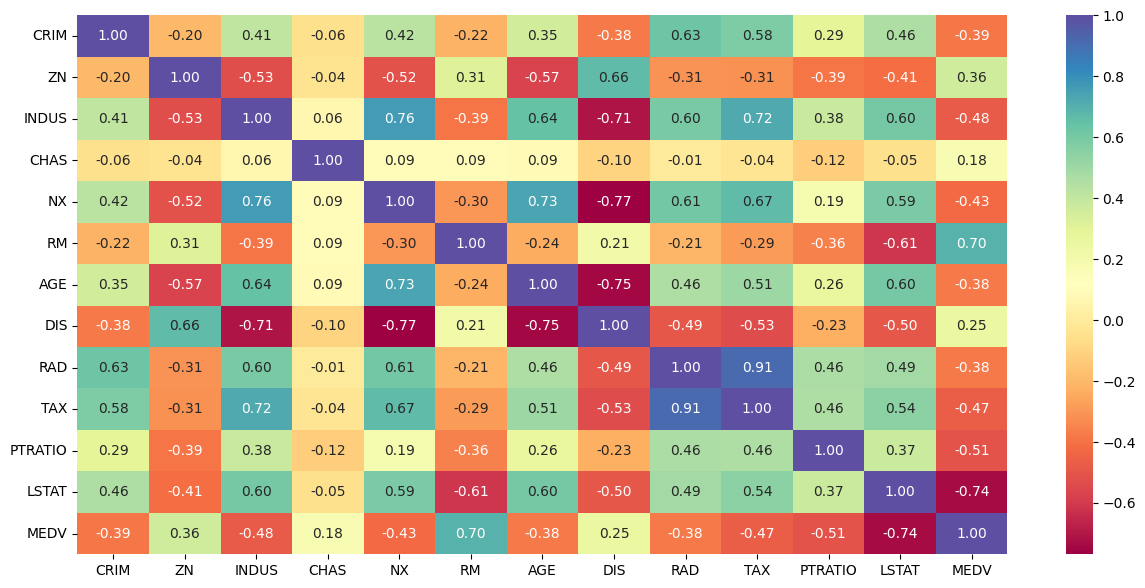

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt='0.2f', cmap = "Spectral")
plt.show()

### Correlation between variables indicates "overlap" of information. This means that this set of 13 variables can perhaps be represented by fewer Principal Components, without losing much information

## Let's check the distribution and outliers for each column in the data

CRIM
Skew : 5.22


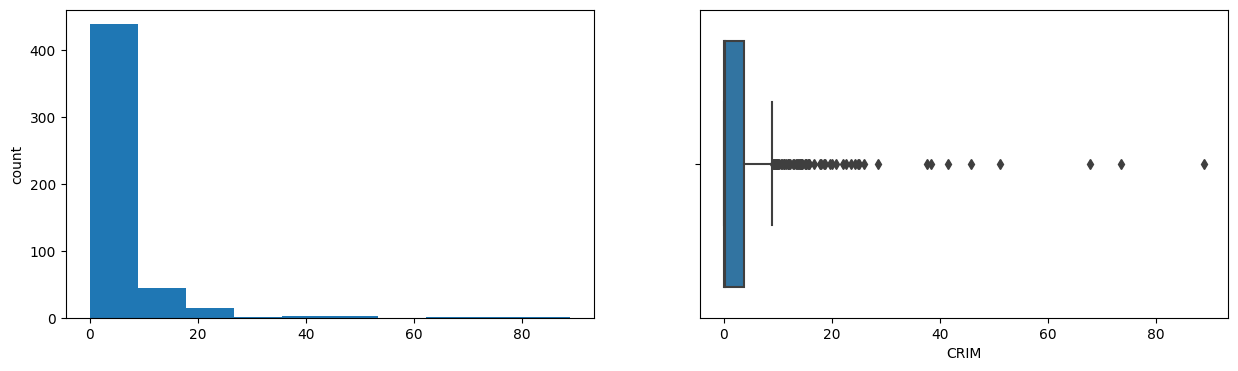

ZN
Skew : 2.23


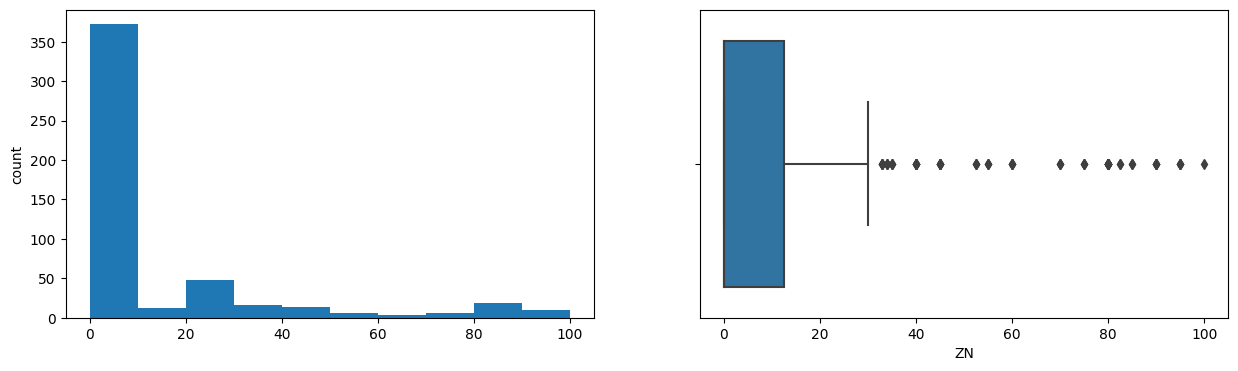

INDUS
Skew : 0.3


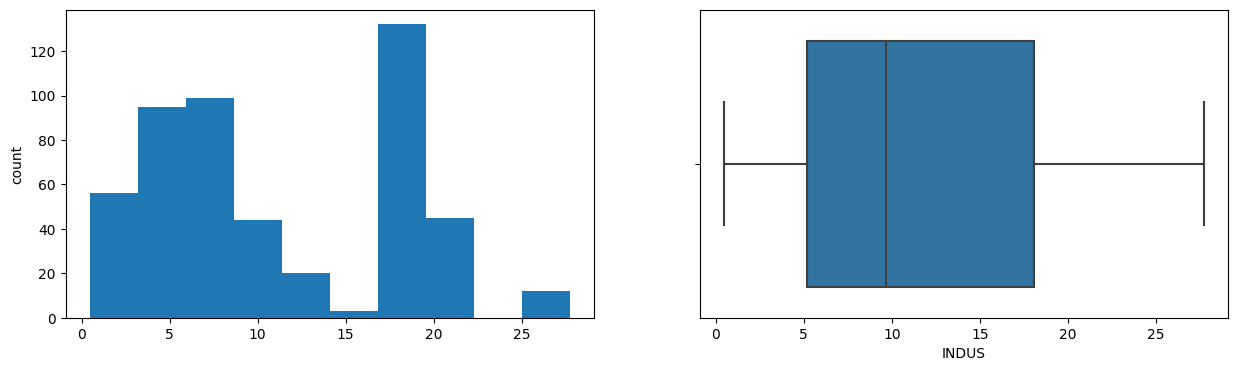

CHAS
Skew : 3.41


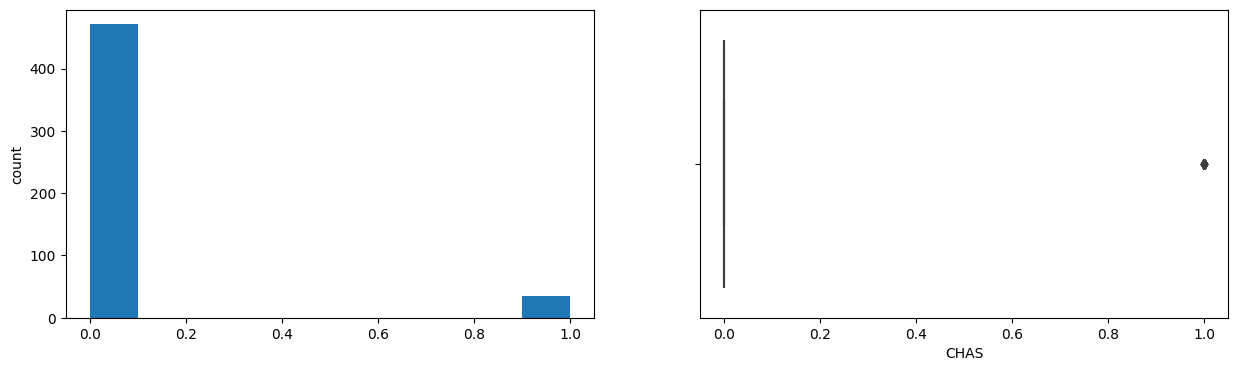

NX
Skew : 0.73


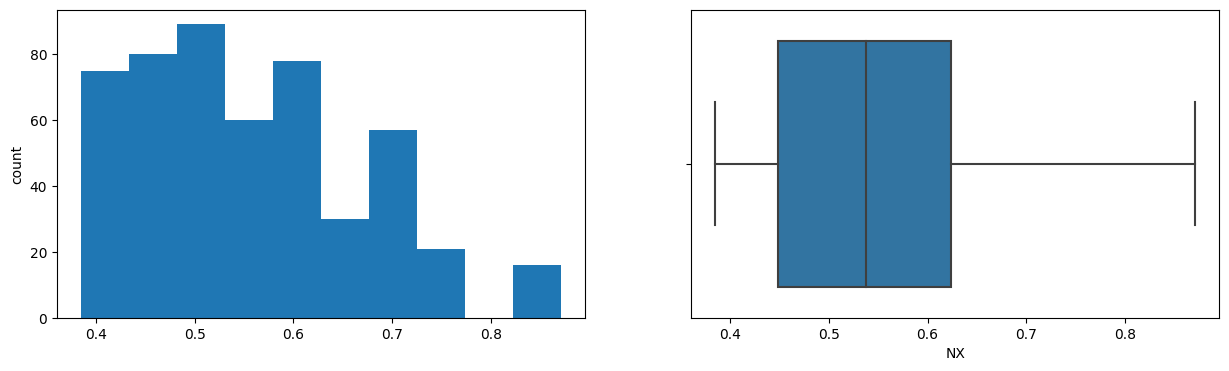

RM
Skew : 0.4


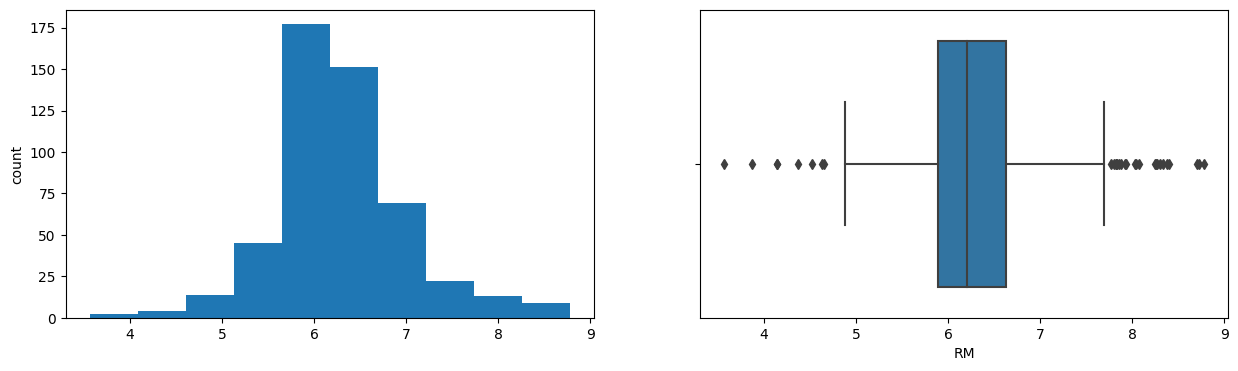

AGE
Skew : -0.6


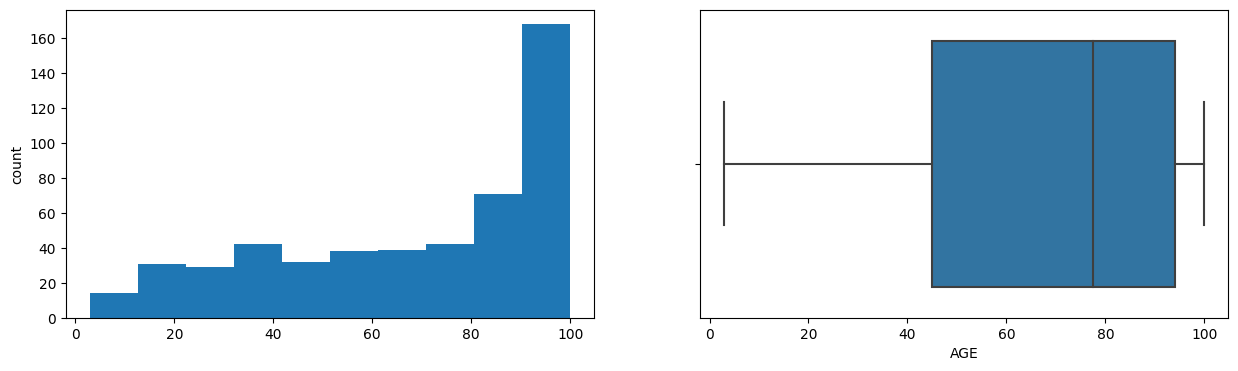

DIS
Skew : 1.01


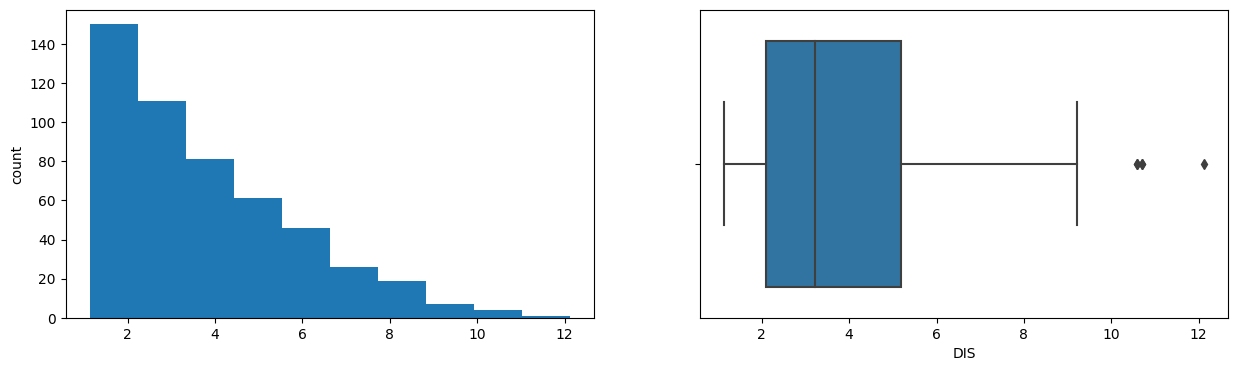

RAD
Skew : 1.0


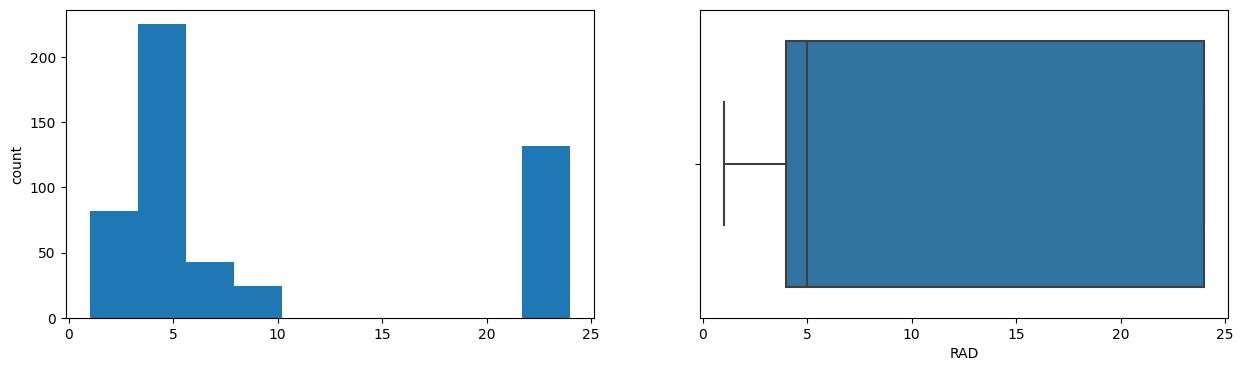

TAX
Skew : 0.67


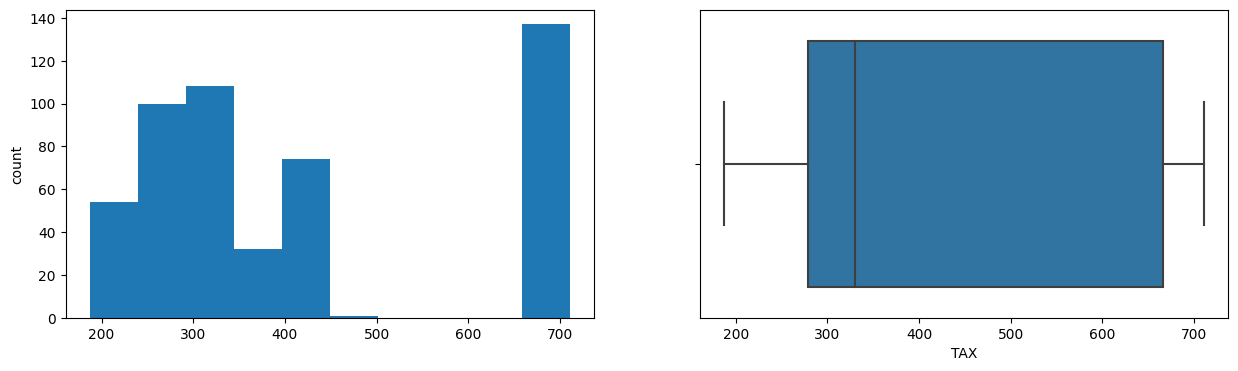

PTRATIO
Skew : -0.8


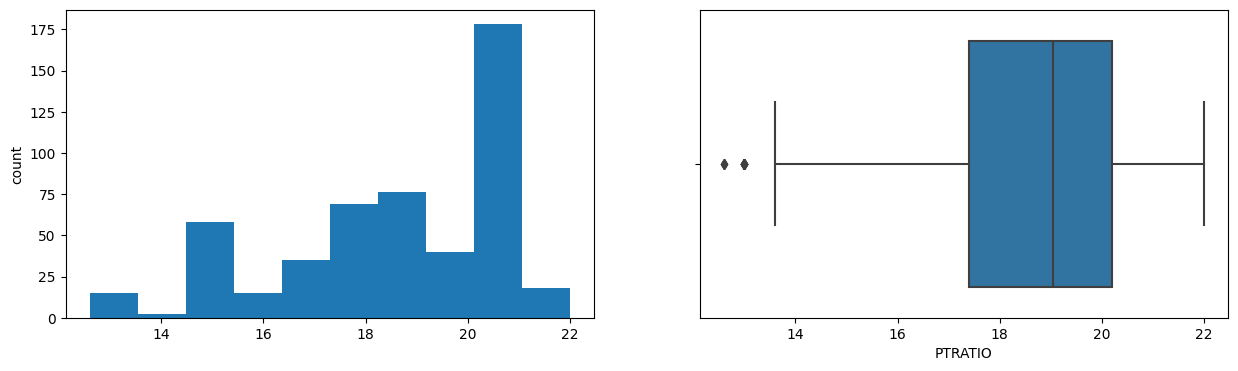

LSTAT
Skew : 0.91


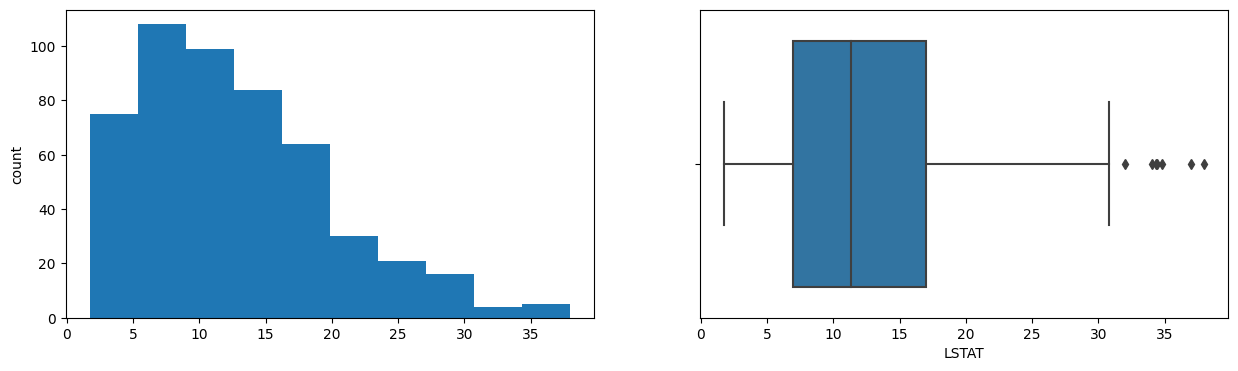

MEDV
Skew : 1.11


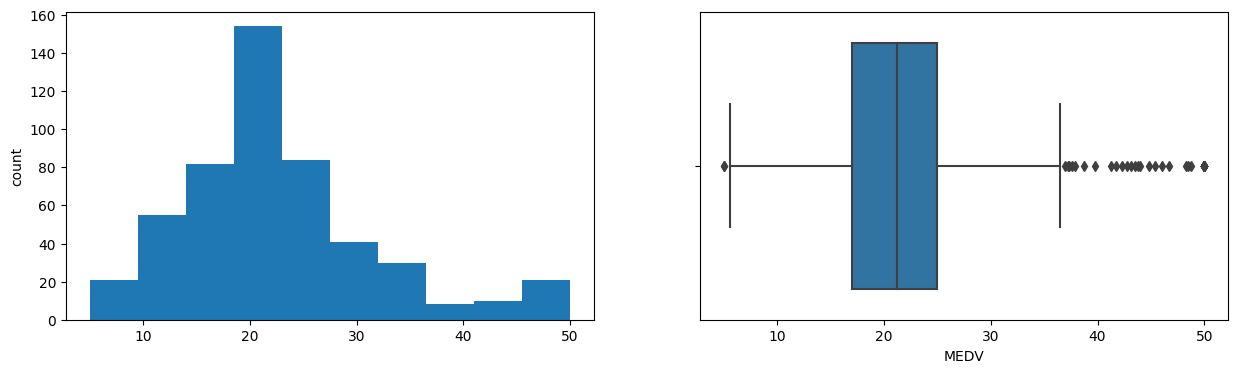

In [9]:
for col in data.columns:
    print(col)
    print("Skew :", round(data[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

## Let us normalize the data, using Standard Scalar

In [10]:
# Scaling the data
scaler = StandardScaler()
dfnew_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [11]:
dfnew_scaled.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503


In [12]:
# executing the PCA function. By default, number of principal Components will be equal to number of features
pca = PCA()
pca.fit(dfnew_scaled)

PCA()

In [13]:
print(pca.components_)

[[ 2.42755751e-01 -2.54412844e-01  3.39194411e-01 -3.39886090e-03
   3.31332714e-01 -2.10573420e-01  3.05261232e-01 -3.05937761e-01
   3.05497402e-01  3.27461336e-01  2.13780264e-01  3.17265523e-01
  -2.71026715e-01]
 [-6.01622995e-02 -1.39722489e-01  1.24192151e-01  4.08542478e-01
   2.52417143e-01  4.41320795e-01  2.55347559e-01 -3.54929105e-01
   3.64441425e-02  1.27180556e-02 -3.17354728e-01 -2.04637155e-01
   4.48097824e-01]
 [ 4.34651707e-01  3.85973151e-01 -4.16482114e-02 -1.43139302e-01
  -4.59927561e-02  3.44610806e-01 -1.94635533e-01  1.47623828e-01
   4.82174396e-01  4.03994650e-01  8.44032239e-02 -1.69248823e-01
   1.66908853e-01]
 [ 1.26013987e-01  3.21682204e-01  2.31814360e-03  8.16180315e-01
  -4.14303788e-04 -2.73248765e-01 -1.21665125e-01  2.11278880e-01
   4.90273484e-02  5.19315778e-02 -1.46179035e-01  1.77812758e-01
  -1.49307971e-01]
 [ 1.76504934e-01  3.52165441e-01  2.89948855e-03 -3.62235049e-01
   2.43834048e-01 -1.00167568e-01  1.22383625e-01 -3.77035583e-02


### 13 Principal Components were created, each of which is a weighted linear combination of the original 13 variables. The percentage of variation explained by each Principal Component is shown below:

In [14]:
print(pca.explained_variance_ratio_)

[0.48641508 0.12684563 0.09703739 0.06775397 0.06238083 0.04126246
 0.03106024 0.02155058 0.02015488 0.01641876 0.01413927 0.01032731
 0.00465361]


### The first Eigen Vector explains the maximum variance 48%. Others much less. We can plot it

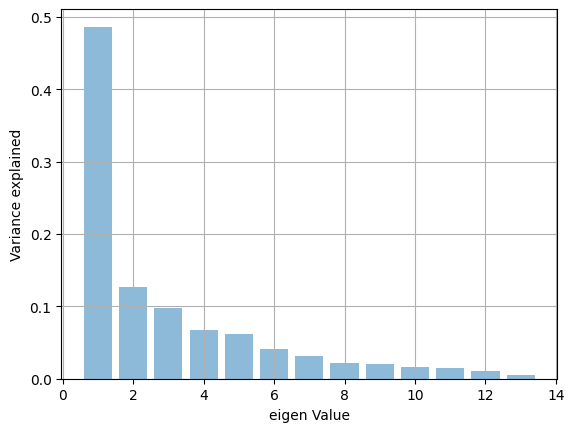

In [15]:
plt.bar(list(range(1, 14)), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.ylabel("Variance explained")
plt.xlabel("eigen Value")
plt.grid(True)
plt.show()

### The first PC explains 48% variance, the second PC explains 12% variance and so on. We can plot the cumulative variance explained.

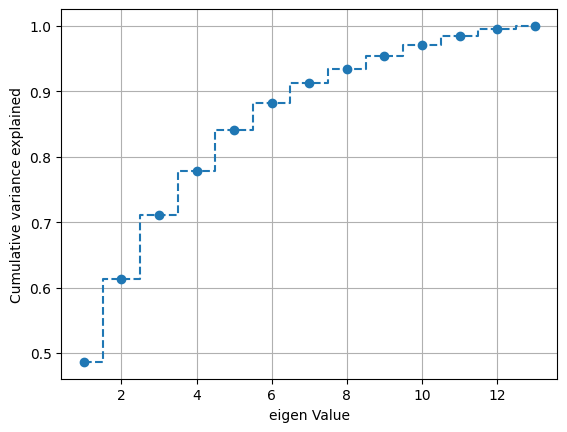

In [16]:
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid',marker="o", linestyle = "--")
plt.ylabel('Cumulative variance explained')
plt.xlabel('eigen Value')
plt.grid(True)
plt.show()
#plt.step(list(range(1,12)),pca.explained_variance_ratio_.cumsum(), marker="o", linestyle = "--")

## Dimensionality Reduction

### We can see that six dimensions (principal Components) explain almost 90% of variance in the original data. Therefore these Principal Components can very well be used in place of the original 13 variables for model building.

### We will now fit six principal components to our (scaled) data

In [17]:
pca2 = PCA(n_components=6, random_state=1)
dfpca2 = pd.DataFrame(pca2.fit_transform(dfnew_scaled))

### The "fit_transform" function calculates the required number of PCs and transforms the data by replacing original features with PCs. The output will be in the form of an array, which can be converted to a data frame, with the pd.DataFrame function

In [18]:
dfpca2.head()

,0,1,2,3,4,5
0,-2.039686,0.490268,-0.444279,-0.340119,0.954991,0.318241
1,-1.304092,-0.189641,-0.970659,-0.535002,-0.079141,0.579442
2,-2.340188,0.914544,-0.113167,-1.095650,-0.548136,0.517723
3,-2.807739,0.199128,0.056922,-0.915616,-0.976986,0.665246
4,-2.736523,0.436826,0.067954,-0.995355,-0.896871,0.742593


### Let us check for multicollinearity among these three components

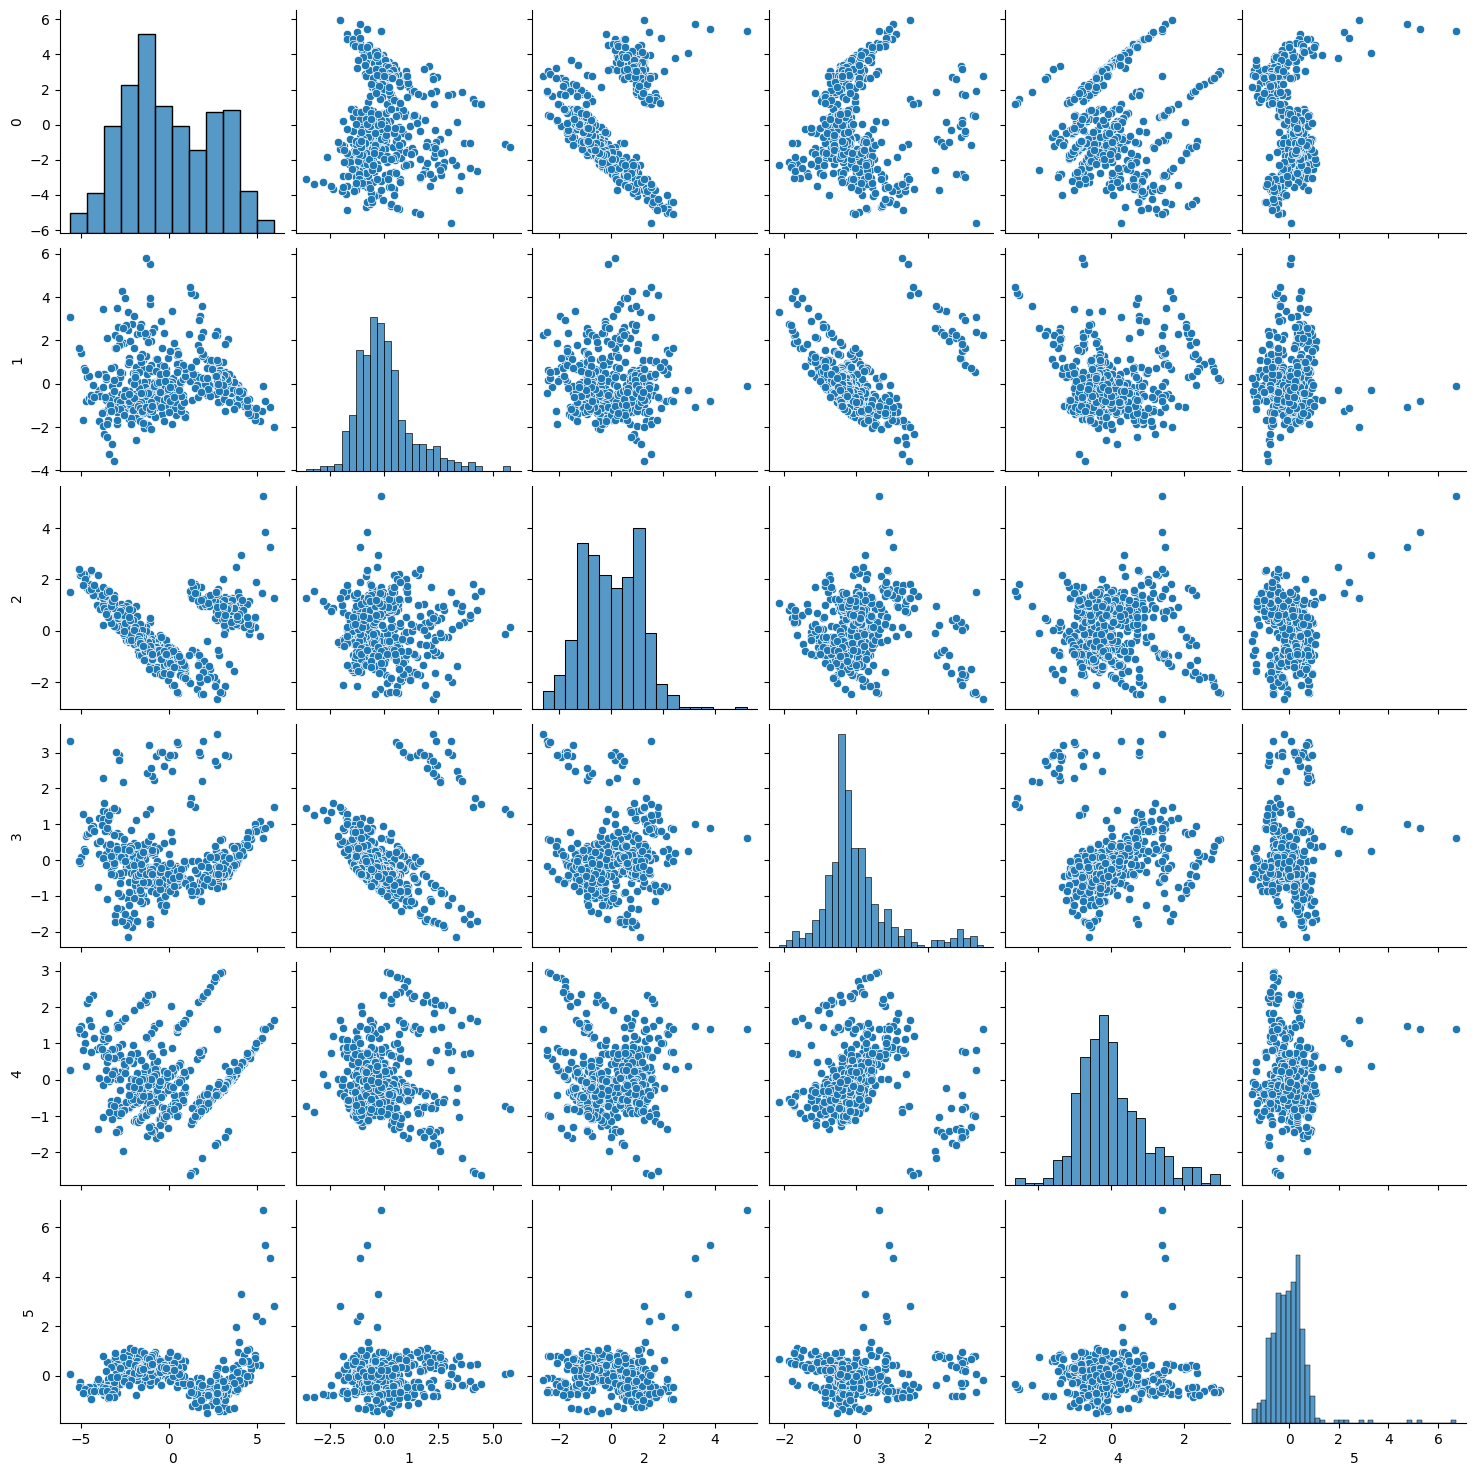

In [19]:
sns.pairplot(dfpca2)

### When we use the 6 PCs in place of original features, we can see that there is no evidence of multicollinearity

### As we can see, our original features are now represented by only six features. Although these new features (Principal Components) are abstract, each PC is a weighted linear combination of the original 13 features. We can understand it as shown below:

In [20]:
pc_comps = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]
show_PCs = pd.DataFrame(
    np.round(pca2.components_, 2), index=pc_comps, columns=dfnew_scaled.columns
)
show_PCs.T

,PC1,PC2,PC3,PC4,PC5,PC6
CRIM,0.24,-0.06,0.43,0.13,0.18,0.76
ZN,-0.25,-0.14,0.39,0.32,0.35,-0.30
INDUS,0.34,0.12,-0.04,0.00,0.00,-0.35
CHAS,-0.00,0.41,-0.14,0.82,-0.36,0.08
NX,0.33,0.25,-0.05,-0.00,0.24,-0.21
RM,-0.21,0.44,0.34,-0.27,-0.10,0.09
AGE,0.31,0.26,-0.19,-0.12,0.12,0.11
DIS,-0.31,-0.35,0.15,0.21,-0.04,-0.10
RAD,0.31,0.04,0.48,0.05,-0.12,-0.15
TAX,0.33,0.01,0.40,0.05,-0.04,-0.33


### We can try to understand the relative weight of each feature in these PCs

In [21]:
def color_high(val):
    if val <= -0.40:  # you can decide any value as per your understanding
        return "background: skyblue"
    elif val >= 0.40:
        return "background: skyblue"


show_PCs.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
CRIM,0.240000,-0.060000,0.430000,0.130000,0.180000,0.760000
ZN,-0.250000,-0.140000,0.390000,0.320000,0.350000,-0.300000
INDUS,0.340000,0.120000,-0.040000,0.000000,0.000000,-0.350000
CHAS,-0.000000,0.410000,-0.140000,0.820000,-0.360000,0.080000
NX,0.330000,0.250000,-0.050000,-0.000000,0.240000,-0.210000
RM,-0.210000,0.440000,0.340000,-0.270000,-0.100000,0.090000
AGE,0.310000,0.260000,-0.190000,-0.120000,0.120000,0.110000
DIS,-0.310000,-0.350000,0.150000,0.210000,-0.040000,-0.100000
RAD,0.310000,0.040000,0.480000,0.050000,-0.120000,-0.150000
TAX,0.330000,0.010000,0.400000,0.050000,-0.040000,-0.330000


## Observations:
### Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:
`0.24 CRIM - 0.25 ZN + 0.34 INDUS + 0 CHAS + 0.33 NX - 0.21 RM + 0.31 AGE - 0.31 DIS + 0.31 RAD + 0.33 TAX + 0.21 PTRATIO + 0.32 LSTAT - 0.27 MEDV

## We will now make two linear models, the first with all the 13 original independent variables and the second with the 6 new variables constructed using PCA.

### First model 

#### Splitting the target and predictor variables

In [22]:
# independant variables
X = data.drop(["MEDV"], axis=1)
# the dependent variable
y = data[["MEDV"]]

### Bivariate Plots

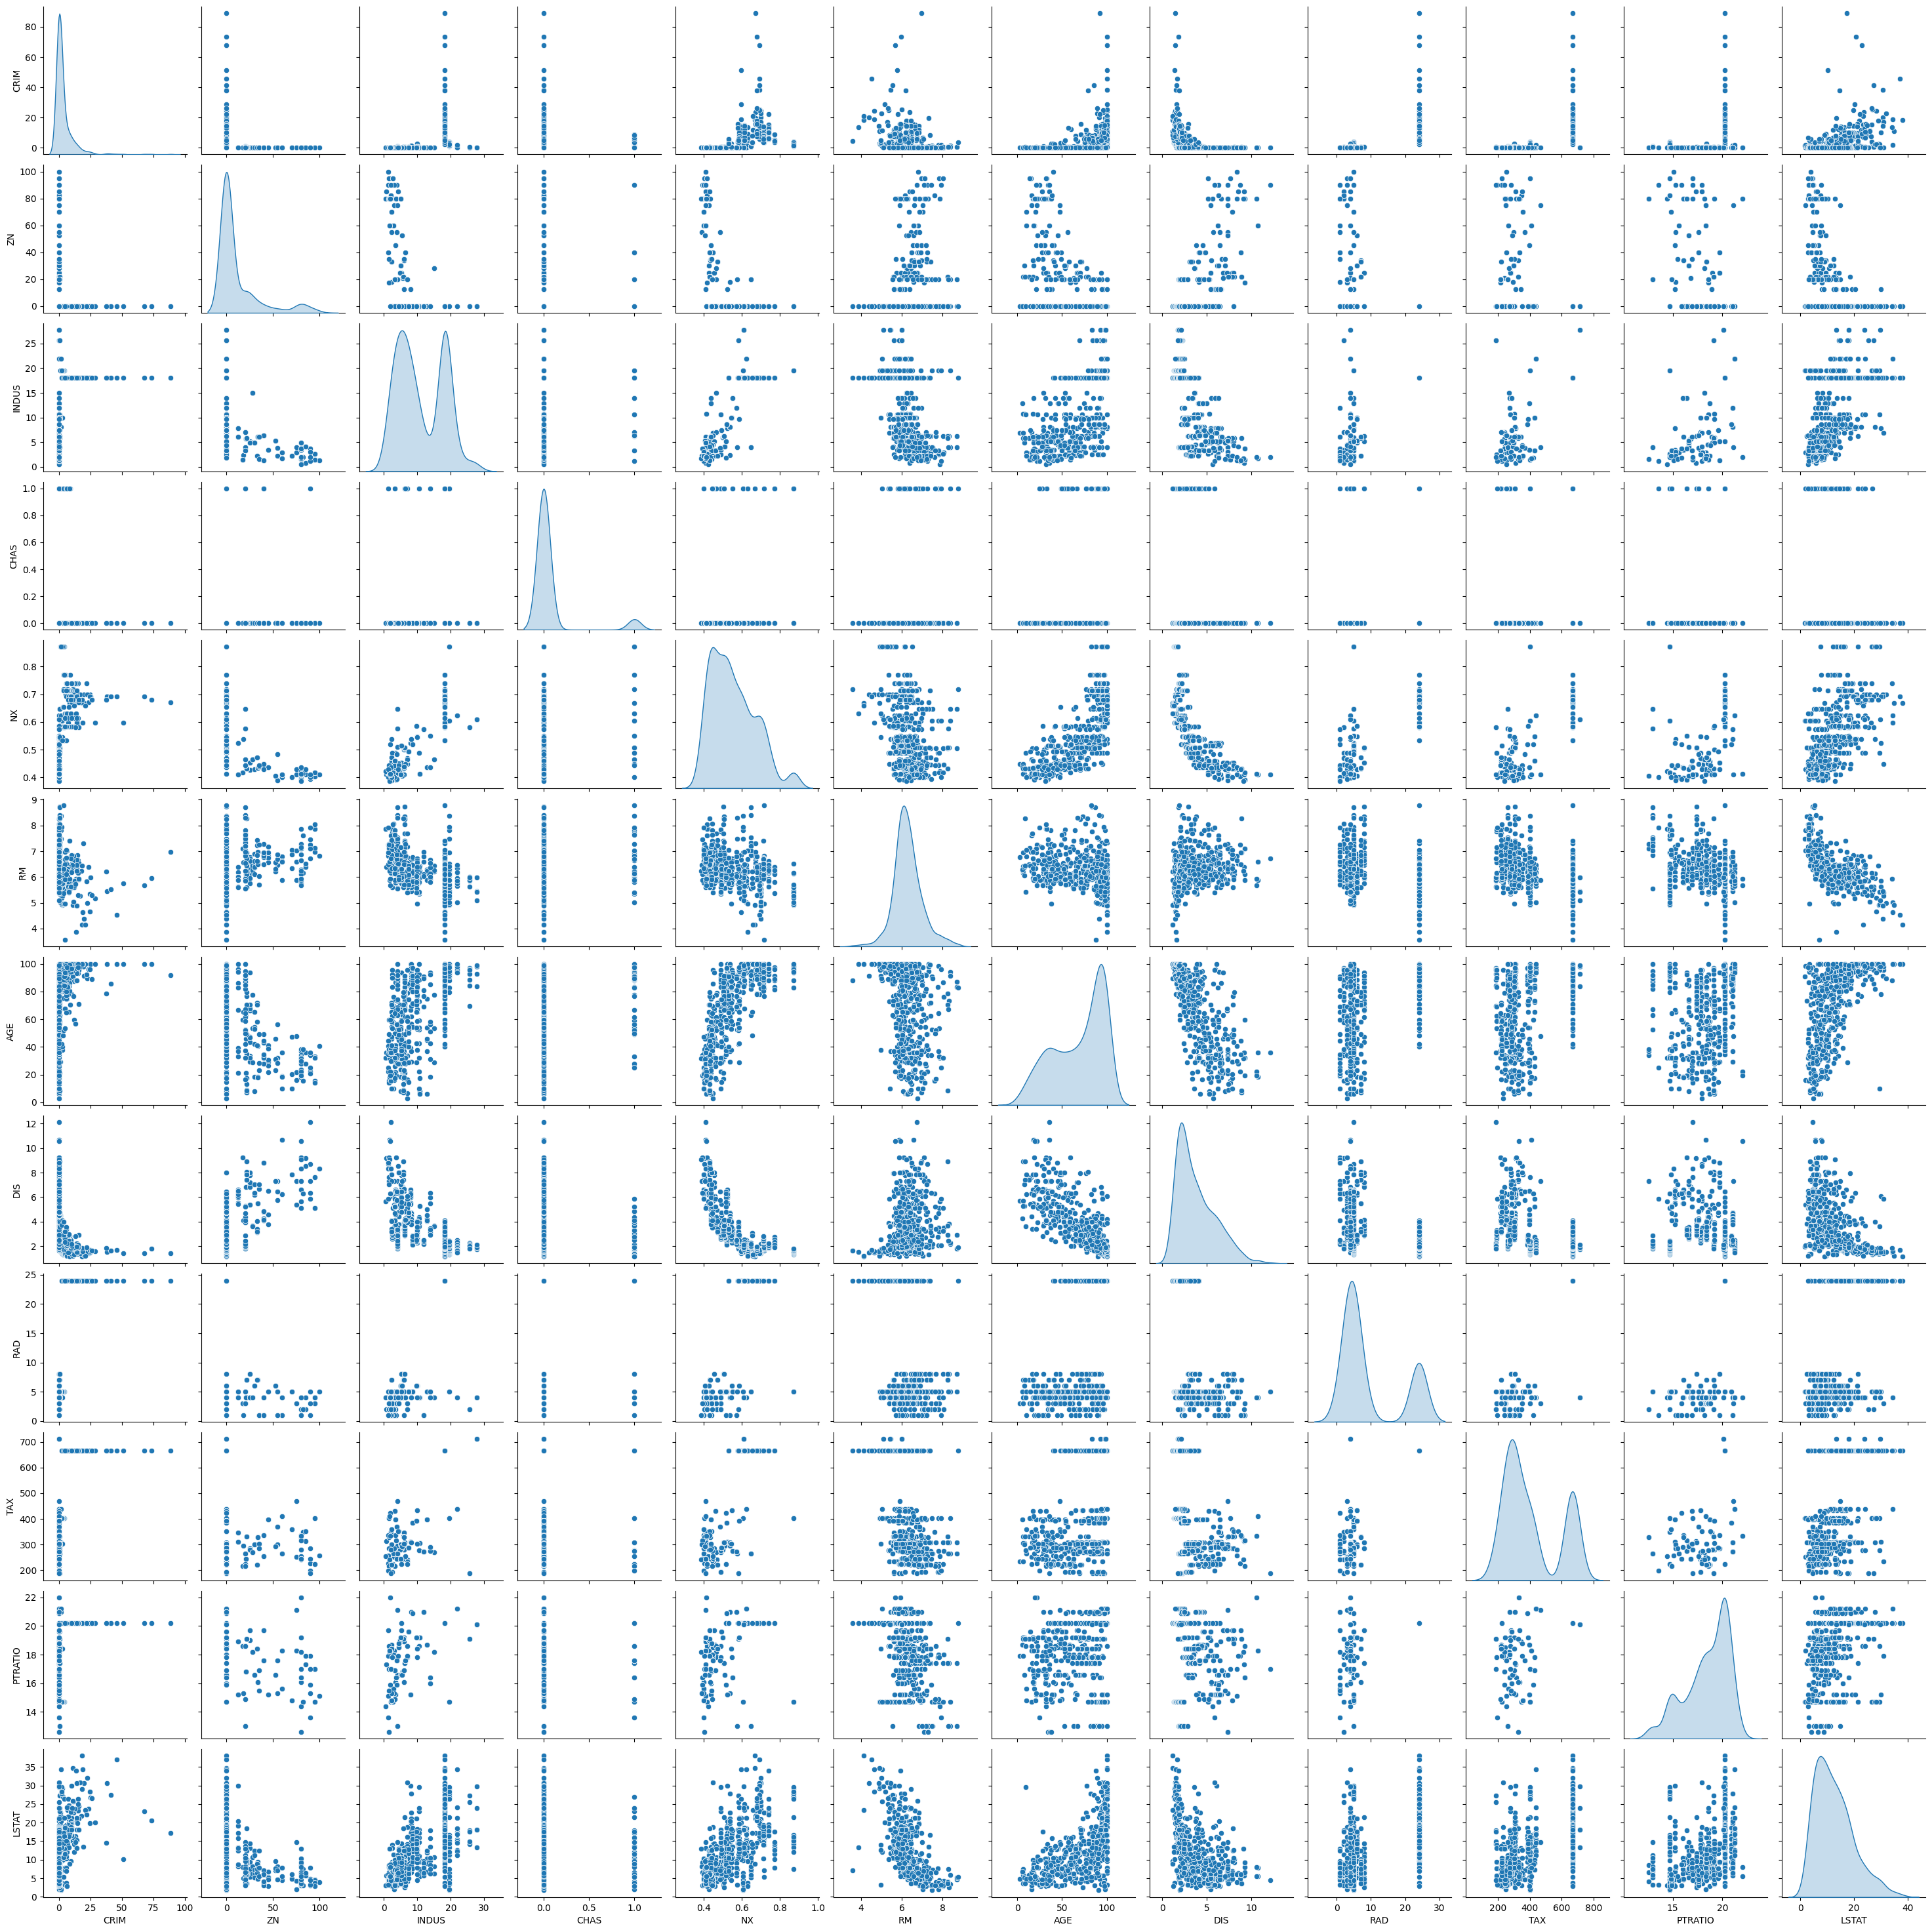

In [23]:
sns.pairplot(data=X, diag_kind="kde")

In [24]:
regression_origdata = LinearRegression()
regression_origdata.fit(X, y)

LinearRegression()

### We will define a function to evaluate the metrics of the linear regression model

In [25]:
# function to compute different metrics to check performance of a regression model


def mape_score(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "R-squared": r2,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [26]:
regression_origdata_perf = model_performance_regression(regression_origdata, X, y)
regression_origdata_perf

,R-squared,RMSE,MAE,MAPE
0,0.734307,4.735998,3.356306,16.929536


### Fitting linear regression on transformed data with principal components

In [27]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(dfpca2, y)

LinearRegression()

In [28]:
regression_model_pca_perf = model_performance_regression(
    regression_model_pca, dfpca2, y
)
regression_model_pca_perf

,R-squared,RMSE,MAE,MAPE
0,0.854586,3.503678,2.36328,12.789104


### We see that explained variance (R-square) increased by 12% although we managed to get rid of 50% variables. This means that a model based on PCA is more efficient and faster, without losing any information.